## DESCRIPCIÓN DEL PROBLEMA A RESOVER 
 
Estrategia  de  Campaña  Telefónica  para  Depósitos  a  Plazo  Fijo  en  el 
Contexto Bancario

#### Introducción: 
 
En el dinámico mundo bancario, los depósitos a plazo fijo son esenciales 
tanto  para  los  clientes  como  para  las  entidades  bancarias.  Estos  productos 
financieros  ofrecen  estabilidad  y  rentabilidad.  Sin  embargo,  las  entidades 
bancarias se enfrentan al desafío de identificar clientes potenciales y optimizar 
sus recursos para llevar a cabo campañas telefónicas efectivas

#### Objetivos: 
 
Realizar un análisis exploratorio detallado sobre los diferentes tipos de 
clientes presentes en el conjunto de datos. 
Desarrollar un modelo predictivo para identificar qué clientes tienen más 
probabilidad de contratar un depósito a plazo fijo. 
Explicar los resultados obtenidos y proporcionar recomendaciones para 
mejorar la eficacia de futuras campañas.

#### Desarrollo del Caso: 
 
- Parte 1 (Análisis Exploratorio de Clientes)

- Parte 2 (Modelo Predictivo)

- Parte 3 (Explicación de Resultados)

### Librerias

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargamos la Data (Train)
- Se crea una copia de la data para no 'machacar' la data original.

In [145]:
original = pd.read_csv('Data_Train.csv', sep = ';')
df_copia = original.copy()
df_copia

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,NaN,192,16-may-2021,1,-1,0,NaN,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,NaN,83,9-jun-2021,2,-1,0,NaN,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,NaN,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,NaN,250,9-jun-2021,1,-1,0,NaN,no
44252,44253,49,technician,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,NaN,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,NaN,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,NaN,no


## Quitaremos los nulos para poder trabajar limpio

In [146]:
df_copia.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                         1810
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12730
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    36163
target                               0
dtype: int64

In [147]:
# Vamos a eliminar los valores nulos de la columna educacion

df_copia = df_copia.dropna(subset = ['educacion'])
df_copia.isnull().sum()

ID                                   0
edad                                 0
trabajo                              0
estado_civil                         0
educacion                            0
deuda                                0
saldo                                0
vivienda                             0
prestamo                             0
tipo_contacto                    12072
duracion                             0
fecha_contacto                       0
campaign                             0
tiempo_transcurrido                  0
contactos_anteriores                 0
resultado_campanas_anteriores    34670
target                               0
dtype: int64

In [148]:
# Vamos a cambiar los valores nulos de la columna 'tipo_contacto' y 'resultado_campanas_anteriores' por 'Sin_Informacion'ArithmeticError

df_copia['tipo_contacto'] = df_copia['tipo_contacto'].fillna('Sin_Informacion')

df_copia['resultado_campanas_anteriores'] = df_copia['resultado_campanas_anteriores'].fillna('Sin_Informacion')

df_copia.isnull().sum()

C:\Users\Juan\AppData\Local\Temp\ipykernel_1760\382237391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['tipo_contacto'] = df_copia['tipo_contacto'].fillna('Sin_Informacion')
C:\Users\Juan\AppData\Local\Temp\ipykernel_1760\382237391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['resultado_campanas_anteriores'] = df_copia['resultado_campanas_anteriores'].fillna('Sin_Informacion')


ID                               0
edad                             0
trabajo                          0
estado_civil                     0
educacion                        0
deuda                            0
saldo                            0
vivienda                         0
prestamo                         0
tipo_contacto                    0
duracion                         0
fecha_contacto                   0
campaign                         0
tiempo_transcurrido              0
contactos_anteriores             0
resultado_campanas_anteriores    0
target                           0
dtype: int64

In [149]:
df_copia

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,Sin_Informacion,192,16-may-2021,1,-1,0,Sin_Informacion,no
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,Sin_Informacion,83,9-jun-2021,2,-1,0,Sin_Informacion,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,Sin_Informacion,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,Sin_Informacion,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,Sin_Informacion,250,9-jun-2021,1,-1,0,Sin_Informacion,no
44252,44253,49,technician,casado,secundaria/superiores,no,1982,si,si,movil,73,22-aug-2021,15,-1,0,Sin_Informacion,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,Sin_Informacion,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,Sin_Informacion,no


In [150]:
clientes_ideales = df_copia[df_copia['saldo']>= 5000]
clientes_ideales



,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
19,20,33,management,soltero,universitarios,no,5437,no,no,movil,267,4-may-2021,1,91,1,sin_exito,si
29,30,51,blue-collar,casado,universitarios,no,7816,si,no,Sin_Informacion,76,12-may-2021,2,-1,0,Sin_Informacion,no
49,50,36,services,casado,secundaria/superiores,no,8114,si,no,Sin_Informacion,505,6-jun-2021,1,-1,0,Sin_Informacion,no
55,56,33,unemployed,soltero,universitarios,no,14889,si,no,movil,22,3-feb-2021,3,-1,0,Sin_Informacion,no
65,66,32,blue-collar,casado,secundaria/superiores,no,10142,si,no,movil,249,20-nov-2021,1,-1,0,Sin_Informacion,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44212,44213,42,technician,casado,universitarios,no,14282,si,no,movil,649,6-aug-2021,4,-1,0,Sin_Informacion,si
44233,44234,54,management,divorciado,universitarios,no,26306,si,no,movil,27,11-feb-2021,1,84,3,sin_exito,no
44234,44235,45,technician,casado,priamaria,no,6535,no,no,movil,639,30-jul-2021,2,-1,0,Sin_Informacion,no
44239,44240,51,entrepreneur,casado,universitarios,no,6659,si,si,movil,191,20-nov-2021,2,189,1,sin_exito,no


In [151]:
clientes_con_potencial_medio = df_copia[(df_copia['saldo'] >= 1500) & (df_copia['saldo'] <= 4999)]
clientes_con_potencial_medio


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,Sin_Informacion,83,9-jun-2021,2,-1,0,Sin_Informacion,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
24,25,33,entrepreneur,soltero,universitarios,no,3017,no,no,movil,240,21-nov-2021,3,-1,0,Sin_Informacion,no
33,34,49,admin.,casado,secundaria/superiores,no,2254,no,no,movil,77,5-aug-2021,1,-1,0,Sin_Informacion,no
42,43,37,admin.,casado,secundaria/superiores,no,1967,no,no,fijo,376,27-oct-2021,1,-1,0,Sin_Informacion,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44204,44205,35,management,soltero,secundaria/superiores,no,3384,si,no,movil,372,31-jul-2021,2,-1,0,Sin_Informacion,no
44209,44210,34,management,casado,universitarios,no,2374,si,si,movil,270,18-jun-2021,2,314,2,sin_exito,si
44221,44222,37,admin.,casado,universitarios,no,3221,no,no,movil,379,15-jun-2021,2,376,13,otro,si
44244,44245,31,management,soltero,universitarios,no,3384,no,no,movil,247,22-mar-2021,3,187,3,exito,si


In [152]:
clientes_NO_potenciales = df_copia[df_copia['saldo']<= 1499]
clientes_NO_potenciales


,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,Sin_Informacion,192,16-may-2021,1,-1,0,Sin_Informacion,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,Sin_Informacion,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,Sin_Informacion,no
5,6,28,blue-collar,casado,secundaria/superiores,no,1134,no,no,movil,130,9-feb-2021,3,-1,0,Sin_Informacion,no
6,7,24,management,soltero,universitarios,no,1085,no,si,movil,95,7-may-2021,6,-1,0,Sin_Informacion,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44250,44251,30,management,divorciado,secundaria/superiores,no,37,no,no,Sin_Informacion,262,12-may-2021,2,-1,0,Sin_Informacion,no
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,Sin_Informacion,250,9-jun-2021,1,-1,0,Sin_Informacion,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,Sin_Informacion,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,Sin_Informacion,no


# Comenzaremos a buscar patrones en nuestros 3 grupos

In [153]:
# buscaremos dentro de clientes_ideales, clientes_con_potencial_medio y clientes_NO_potenciales cuantos tienen 'si' en la columna target y cuantos tienen 'no'

print("Tenemos un total de: \n", clientes_ideales['target'].value_counts())
print("Tenemos un total de: \n",clientes_con_potencial_medio['target'].value_counts())
print("Tenemos un total de: \n",clientes_NO_potenciales['target'].value_counts())

Tenemos un total de: 
 target
no    2239
si     406
Name: count, dtype: int64
Tenemos un total de: 
 target
no    6282
si    1226
Name: count, dtype: int64
Tenemos un total de: 
 target
no    28984
si     3309
Name: count, dtype: int64


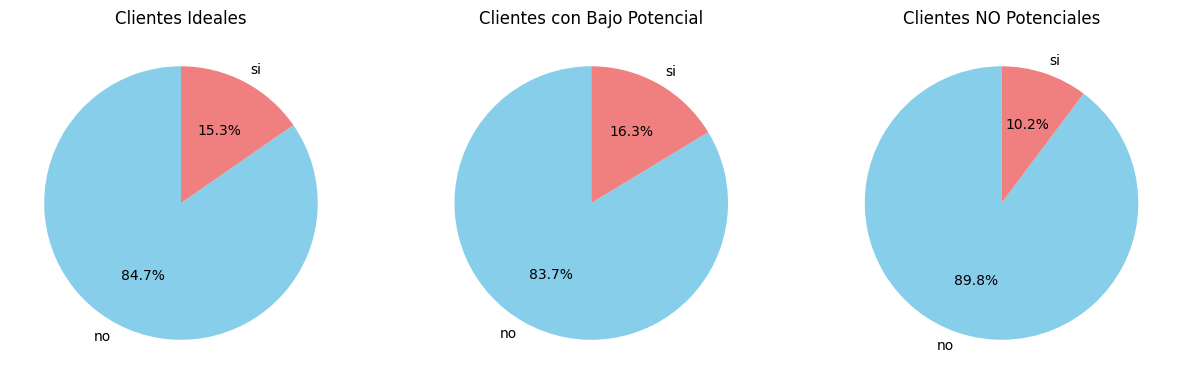

In [154]:
import matplotlib.pyplot as plt

# Datos
targets_ideales = clientes_ideales['target'].value_counts()
targets_con_bajo_potencial = clientes_con_potencial_medio['target'].value_counts()
targets_NO_potenciales = clientes_NO_potenciales['target'].value_counts()

# Graficar
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico para clientes ideales
axs[0].pie(targets_ideales, labels=targets_ideales.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[0].set_title('Clientes Ideales')

# Gráfico para clientes con bajo potencial
axs[1].pie(targets_con_bajo_potencial, labels=targets_con_bajo_potencial.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[1].set_title('Clientes con Bajo Potencial')

# Gráfico para clientes NO potenciales
axs[2].pie(targets_NO_potenciales, labels=targets_NO_potenciales.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
axs[2].set_title('Clientes NO Potenciales')

plt.show()


In [155]:
# buscaremos dentro de clientes_ideales, clientes_con_potencial_medio y clientes_NO_potenciales aquellos que tengan 'si' en la columna 'target', tengan 'si' en la columna 'vivienda', tengan 'no' en la columna 'deuda'

clientes_ideales_targetSI_viviendaSI_deudaNO = clientes_ideales[(clientes_ideales['target'] == 'si') & (clientes_ideales['vivienda'] == 'si') & (clientes_ideales['deuda'] == 'no')]
clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO = clientes_con_potencial_medio[(clientes_con_potencial_medio['target'] == 'si') & (clientes_con_potencial_medio['vivienda'] == 'si') & (clientes_con_potencial_medio['deuda'] == 'no')]
clientes_NO_potenciales_targetSI_viviendaSI_deudaNO = clientes_NO_potenciales[(clientes_NO_potenciales['target'] == 'si') & (clientes_NO_potenciales['vivienda'] == 'si') & (clientes_NO_potenciales['deuda'] == 'no')]

# Contaremos cuantas personas hay en cada uno de los dataframe 

num_clientes_ideales_con_condiciones_optimas = len(clientes_ideales_targetSI_viviendaSI_deudaNO)
num_clientes_con_potencial_medio_con_condiciones_optimas = len(clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO)
num_clientes_NO_potenciales_con_condiciones_optimas = len(clientes_NO_potenciales_targetSI_viviendaSI_deudaNO)

print("Número de personas en clientes ideales con target 'si', vivienda 'si' y deuda 'no':", num_clientes_ideales_con_condiciones_optimas)
print("Número de personas en clientes con bajo potencial con target 'si', vivienda 'si' y deuda 'no':", num_clientes_con_potencial_medio_con_condiciones_optimas)
print("Número de personas en clientes NO potenciales con target 'si', vivienda 'si' y deuda 'no':", num_clientes_NO_potenciales_con_condiciones_optimas)

Número de personas en clientes ideales con target 'si', vivienda 'si' y deuda 'no': 123
Número de personas en clientes con bajo potencial con target 'si', vivienda 'si' y deuda 'no': 371
Número de personas en clientes NO potenciales con target 'si', vivienda 'si' y deuda 'no': 1324


In [156]:
# buscaremos dentro de clientes_ideales, clientes_con_potencial_medio y clientes_NO_potenciales cuales tienen 'si' en la columna 'target' y tiempos min,max y mean en la columna 'duracion'

print("Clientes ideales:")
print("Tiempo mínimo de duración:", clientes_ideales[clientes_ideales['target'] == 'si']['duracion'].min())
print("Tiempo máximo de duración:", clientes_ideales[clientes_ideales['target'] == 'si']['duracion'].max())
print("Tiempo promedio de duración:", clientes_ideales[clientes_ideales['target'] == 'si']['duracion'].mean())

print("\nClientes con bajo potencial:")
print("Tiempo mínimo de duración:", clientes_con_potencial_medio[clientes_con_potencial_medio['target'] == 'si']['duracion'].min())
print("Tiempo máximo de duración:", clientes_con_potencial_medio[clientes_con_potencial_medio['target'] == 'si']['duracion'].max())
print("Tiempo promedio de duración:", clientes_con_potencial_medio[clientes_con_potencial_medio['target'] == 'si']['duracion'].mean())

print("\nClientes NO potenciales:")
print("Tiempo mínimo de duración:", clientes_NO_potenciales[clientes_NO_potenciales['target'] == 'si']['duracion'].min())
print("Tiempo máximo de duración:", clientes_NO_potenciales[clientes_NO_potenciales['target'] == 'si']['duracion'].max())
print("Tiempo promedio de duración:", clientes_NO_potenciales[clientes_NO_potenciales['target'] == 'si']['duracion'].mean())


Clientes ideales:
Tiempo mínimo de duración: 69
Tiempo máximo de duración: 2372
Tiempo promedio de duración: 519.4187192118227

Clientes con bajo potencial:
Tiempo mínimo de duración: 49
Tiempo máximo de duración: 2770
Tiempo promedio de duración: 498.26019575856446

Clientes NO potenciales:
Tiempo mínimo de duración: 8
Tiempo máximo de duración: 3881
Tiempo promedio de duración: 559.4369900271986


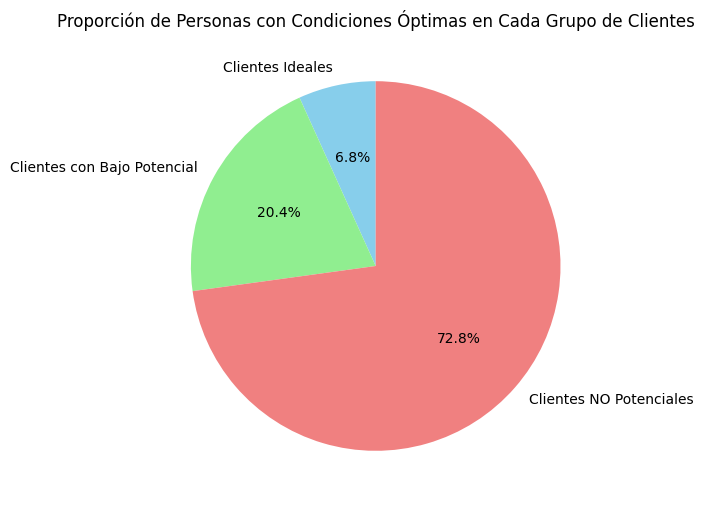

In [157]:
import matplotlib.pyplot as plt

# Definir los datos
num_personas = [num_clientes_ideales_con_condiciones_optimas, num_clientes_con_potencial_medio_con_condiciones_optimas, num_clientes_NO_potenciales_con_condiciones_optimas]
grupos = ['Clientes Ideales', 'Clientes con Bajo Potencial', 'Clientes NO Potenciales']

# Graficar
plt.figure(figsize=(8, 6))
plt.pie(num_personas, labels=grupos, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Proporción de Personas con Condiciones Óptimas en Cada Grupo de Clientes')
plt.show()


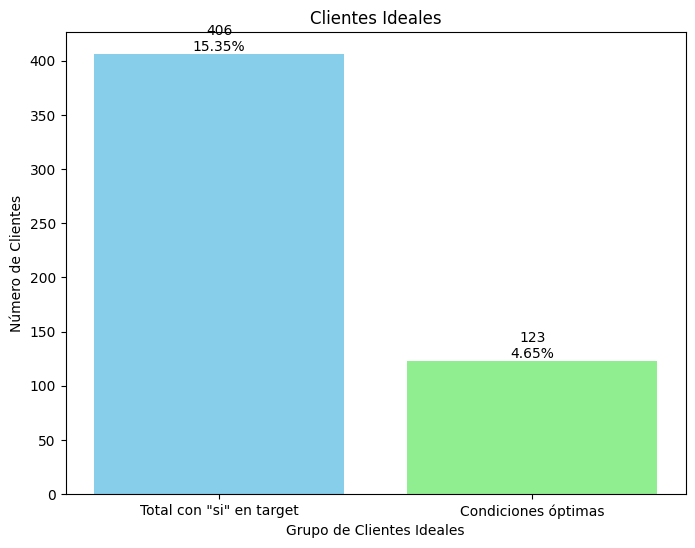

In [158]:
import matplotlib.pyplot as plt

# Definir los datos
clientes_ideales_total_si = len(clientes_ideales[clientes_ideales['target'] == 'si'])
clientes_ideales_condiciones_optimas = len(clientes_ideales_targetSI_viviendaSI_deudaNO)
porcentaje_total_si = (clientes_ideales_total_si / len(clientes_ideales)) * 100
porcentaje_condiciones_optimas = (clientes_ideales_condiciones_optimas / len(clientes_ideales)) * 100

# Graficar
plt.figure(figsize=(8, 6))
barplot = plt.bar(['Total con "si" en target', 'Condiciones óptimas'], [clientes_ideales_total_si, clientes_ideales_condiciones_optimas], color=['skyblue', 'lightgreen'])
plt.xlabel('Grupo de Clientes Ideales')
plt.ylabel('Número de Clientes')

# Agregar número y porcentaje en cada barra
for i, bar in enumerate(barplot):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}\n{round((height / len(clientes_ideales)) * 100, 2)}%', ha='center', va='bottom')

plt.title('Clientes Ideales')
plt.show()




# Buscaremos contactos_anteriores, resultado_campanas_anteriores y duracion. Buscaremos patrones

## CLientes_ideales

In [159]:
# buscaremos para clientes_ideales_targetSI_viviendaSI_deudaNO que valores hay en su columna 'contactos_anteriores' y el valor min,max y mean en la columna 'duracion'

print("Clientes ideales:")
print("Cantidad de contactos anteriores:", clientes_ideales_targetSI_viviendaSI_deudaNO['contactos_anteriores'].value_counts())
print("Tiempo mínimo de duración:", clientes_ideales_targetSI_viviendaSI_deudaNO[clientes_ideales_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].min())
print("Tiempo máximo de duración:", clientes_ideales_targetSI_viviendaSI_deudaNO[clientes_ideales_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].max())
print("Tiempo promedio de duración:", clientes_ideales_targetSI_viviendaSI_deudaNO[clientes_ideales_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].mean())

Clientes ideales:
Cantidad de contactos anteriores: contactos_anteriores
0     72
1     15
2     12
3      9
5      5
4      3
6      3
9      2
11     1
7      1
Name: count, dtype: int64
Tiempo mínimo de duración: 97
Tiempo máximo de duración: 1789
Tiempo promedio de duración: 634.0243902439024


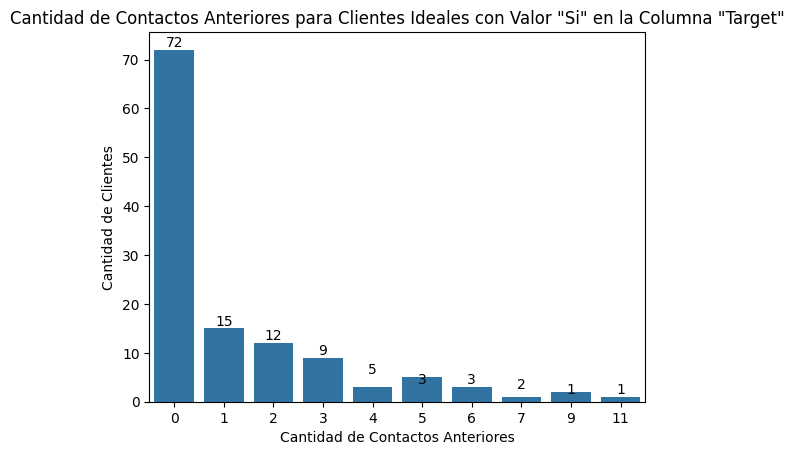

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos en la variable 'clientes_ideales_targetSI_viviendaSI_deudaNO'

# Graficar la cantidad de contactos_anteriores para los clientes con valor 'si' en la columna 'target'
sns.countplot(x='contactos_anteriores', data=clientes_ideales_targetSI_viviendaSI_deudaNO[clientes_ideales_targetSI_viviendaSI_deudaNO['target'] == 'si'])
plt.xlabel('Cantidad de Contactos Anteriores')

# Obtener los conteos para cada valor único de 'contactos_anteriores'
conteo_contactos = clientes_ideales_targetSI_viviendaSI_deudaNO['contactos_anteriores'].value_counts()

# Agregar etiquetas con los valores sobre cada barra
for index, value in enumerate(conteo_contactos):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Contactos Anteriores para Clientes Ideales con Valor "Si" en la Columna "Target"')
plt.show()




In [161]:
clientes_ideales_targetSI_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

resultado_campanas_anteriores
Sin_Informacion    72
sin_exito          26
exito              17
otro                8
Name: count, dtype: int64

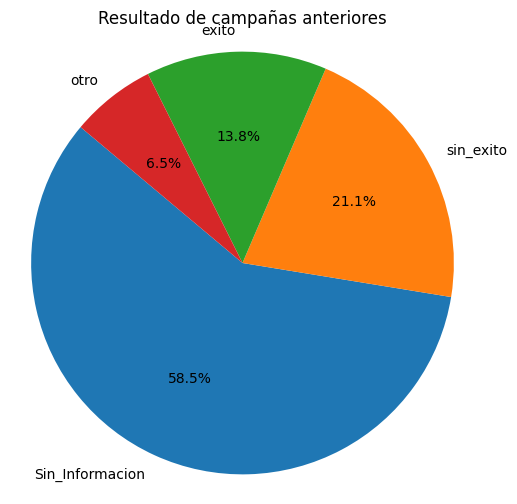

In [162]:
# vamos a graficar con matplotlib formato pie los resultados de la columna 'resultado_campanas_anteriores'  

# Calculamos el conteo de valores
conteo_valores_clientes_ideales = clientes_ideales_targetSI_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

#Vamos a extraer las etiquetas
etiquetas_clientes_ideales = conteo_valores_clientes_ideales.index  
valores_clientes_ideales = conteo_valores_clientes_ideales.values  

# Vamos a configurar el tamaño de la figura
plt.figure(figsize=(6, 6))  

# Graficamos el grafico de torta
plt.pie(valores_clientes_ideales, labels=etiquetas_clientes_ideales, autopct='%1.1f%%', startangle=140)

# Vamos añadir un titulo
plt.title('Resultado de campañas anteriores')

# Mostramos el grafico
plt.axis('equal') # Aseguramos que la grafica de torta sea un circulo
plt.show()


dentro de los clientes_ideales_targetSI_viviendaSI_deudaNO podemos encontrar a 72 personas que 'no' se les contacto o no se tiene informacion anterior de campañas o contactos.

## Clientes con potencial medio

In [163]:
clientes_con_potencial_medio

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
1,2,47,services,soltero,secundaria/superiores,no,3644,no,no,Sin_Informacion,83,9-jun-2021,2,-1,0,Sin_Informacion,no
3,4,42,management,casado,universitarios,no,1773,no,no,movil,311,9-apr-2021,1,336,1,sin_exito,no
24,25,33,entrepreneur,soltero,universitarios,no,3017,no,no,movil,240,21-nov-2021,3,-1,0,Sin_Informacion,no
33,34,49,admin.,casado,secundaria/superiores,no,2254,no,no,movil,77,5-aug-2021,1,-1,0,Sin_Informacion,no
42,43,37,admin.,casado,secundaria/superiores,no,1967,no,no,fijo,376,27-oct-2021,1,-1,0,Sin_Informacion,si
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44204,44205,35,management,soltero,secundaria/superiores,no,3384,si,no,movil,372,31-jul-2021,2,-1,0,Sin_Informacion,no
44209,44210,34,management,casado,universitarios,no,2374,si,si,movil,270,18-jun-2021,2,314,2,sin_exito,si
44221,44222,37,admin.,casado,universitarios,no,3221,no,no,movil,379,15-jun-2021,2,376,13,otro,si
44244,44245,31,management,soltero,universitarios,no,3384,no,no,movil,247,22-mar-2021,3,187,3,exito,si


In [164]:
(clientes_con_potencial_medio['target'] == 'si').sum()

1226

In [165]:
# buscaremos para clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO que valores hay en su columna 'contactos_anteriores' y el valor min,max y mean en la columna 'duracion'

print("Clientes ideales:")
print("Cantidad de contactos anteriores:", clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['contactos_anteriores'].value_counts())
print("Tiempo mínimo de duración:", clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO[clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].min())
print("Tiempo máximo de duración:", clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO[clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].max())
print("Tiempo promedio de duración:", clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO[clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].mean())

Clientes ideales:
Cantidad de contactos anteriores: contactos_anteriores
0     238
1      38
2      23
3      20
4      14
6      10
5       9
7       7
8       5
9       2
10      2
17      1
11      1
12      1
Name: count, dtype: int64
Tiempo mínimo de duración: 49
Tiempo máximo de duración: 2770
Tiempo promedio de duración: 632.1212938005391


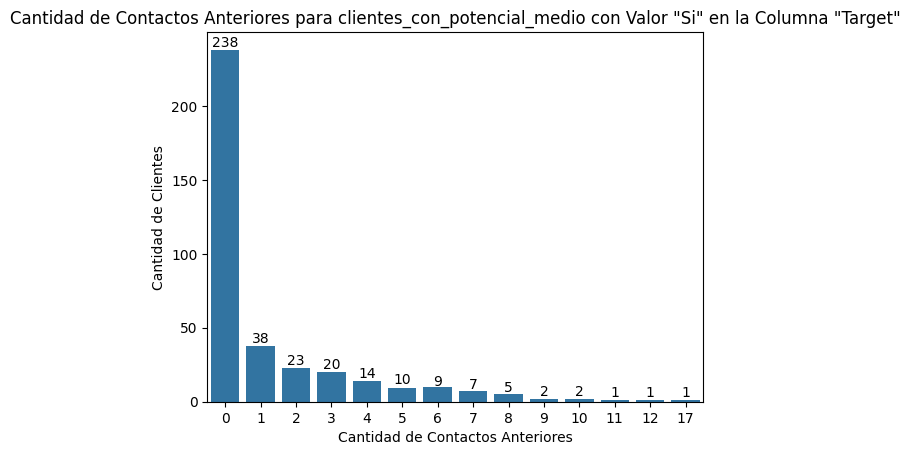

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos en la variable 'clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO'

# Graficar la cantidad de contactos_anteriores para los clientes con valor 'si' en la columna 'target'
sns.countplot(x='contactos_anteriores', data=clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO[clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['target'] == 'si'])
plt.xlabel('Cantidad de Contactos Anteriores')

# Obtener los conteos para cada valor único de 'contactos_anteriores'
conteo_contactos = clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['contactos_anteriores'].value_counts()

# Agregar etiquetas con los valores sobre cada barra
for index, value in enumerate(conteo_contactos):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Contactos Anteriores para clientes_con_potencial_medio con Valor "Si" en la Columna "Target"')
plt.show()

In [167]:
clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

resultado_campanas_anteriores
Sin_Informacion    239
sin_exito           62
exito               48
otro                22
Name: count, dtype: int64

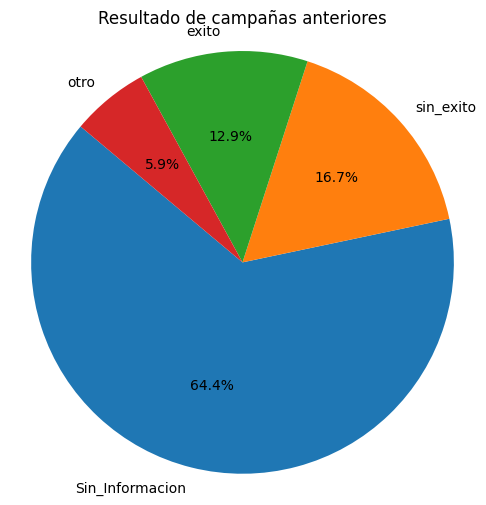

In [168]:
# vamos a graficar con matplotlib formato pie los resultados de la columna 'resultado_campanas_anteriores'  

# Calculamos el conteo de valores
conteo_valores_clientes_con_potencial_medio = clientes_con_potencial_medio_targetSI_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

#Vamos a extraer las etiquetas
etiquetas_clientes_con_potencial_medio = conteo_valores_clientes_con_potencial_medio.index  
valores_clientes_con_potencial_medio = conteo_valores_clientes_con_potencial_medio.values  

# Vamos a configurar el tamaño de la figura
plt.figure(figsize=(6, 6))  

# Graficamos el grafico de torta
plt.pie(valores_clientes_con_potencial_medio, labels=etiquetas_clientes_con_potencial_medio, autopct='%1.1f%%', startangle=140)

# Vamos añadir un titulo
plt.title('Resultado de campañas anteriores')

# Mostramos el grafico
plt.axis('equal') # Aseguramos que la grafica de torta sea un circulo
plt.show()

Encontramos un total de 239 personas con potencial medio con valor 'si' en la columna 'target' pero no tenemos registros de campañas anteriores o contactos anteriores

## Clientes NO potenciales

In [169]:
clientes_NO_potenciales

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
0,1,40,blue-collar,casado,secundaria/superiores,no,580,si,no,Sin_Informacion,192,16-may-2021,1,-1,0,Sin_Informacion,no
2,3,25,student,soltero,universitarios,no,538,si,no,movil,226,20-apr-2021,1,-1,0,Sin_Informacion,no
4,5,56,management,casado,universitarios,no,217,no,si,movil,121,21-jul-2021,2,-1,0,Sin_Informacion,no
5,6,28,blue-collar,casado,secundaria/superiores,no,1134,no,no,movil,130,9-feb-2021,3,-1,0,Sin_Informacion,no
6,7,24,management,soltero,universitarios,no,1085,no,si,movil,95,7-may-2021,6,-1,0,Sin_Informacion,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44250,44251,30,management,divorciado,secundaria/superiores,no,37,no,no,Sin_Informacion,262,12-may-2021,2,-1,0,Sin_Informacion,no
44251,44252,38,management,casado,secundaria/superiores,no,-323,si,no,Sin_Informacion,250,9-jun-2021,1,-1,0,Sin_Informacion,no
44253,44254,51,blue-collar,casado,secundaria/superiores,no,794,si,no,fijo,747,24-jul-2021,1,-1,0,Sin_Informacion,no
44254,44255,29,blue-collar,soltero,universitarios,no,98,no,no,movil,170,10-aug-2021,2,-1,0,Sin_Informacion,no


In [170]:
(clientes_NO_potenciales['target'] == 'si').sum()

3309

In [171]:
# buscaremos para clientes_NO_potenciales_targetSI_viviendaSI_deudaNO que valores hay en su columna 'contactos_anteriores' y el valor min,max y mean en la columna 'duracion'

print("Clientes ideales:")
print("Cantidad de contactos anteriores:", clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['contactos_anteriores'].value_counts())
print("Tiempo mínimo de duración:", clientes_NO_potenciales_targetSI_viviendaSI_deudaNO[clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].min())
print("Tiempo máximo de duración:", clientes_NO_potenciales_targetSI_viviendaSI_deudaNO[clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].max())
print("Tiempo promedio de duración:", clientes_NO_potenciales_targetSI_viviendaSI_deudaNO[clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['target'] == 'si']['duracion'].mean())

Clientes ideales:
Cantidad de contactos anteriores: contactos_anteriores
0     892
1     122
2     110
3      57
4      43
5      30
6      19
7      11
8      10
9       6
10      4
13      4
14      3
11      3
12      3
17      2
58      1
15      1
55      1
30      1
22      1
Name: count, dtype: int64
Tiempo mínimo de duración: 25
Tiempo máximo de duración: 3253
Tiempo promedio de duración: 675.1117824773414


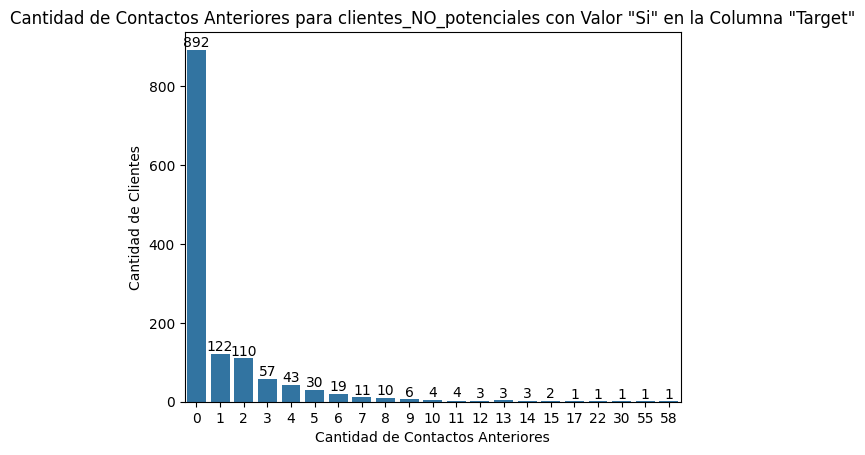

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes tus datos en la variable 'clientes_NO_potenciales_targetSI_viviendaSI_deudaNO'

# Graficar la cantidad de contactos_anteriores para los clientes con valor 'si' en la columna 'target'
sns.countplot(x='contactos_anteriores', data=clientes_NO_potenciales_targetSI_viviendaSI_deudaNO[clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['target'] == 'si'])
plt.xlabel('Cantidad de Contactos Anteriores')

# Obtener los conteos para cada valor único de 'contactos_anteriores'
conteo_contactos = clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['contactos_anteriores'].value_counts()

# Agregar etiquetas con los valores sobre cada barra
for index, value in enumerate(conteo_contactos):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Contactos Anteriores para clientes_NO_potenciales con Valor "Si" en la Columna "Target"')
plt.show()

In [173]:
clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

resultado_campanas_anteriores
Sin_Informacion    892
sin_exito          190
exito              167
otro                75
Name: count, dtype: int64

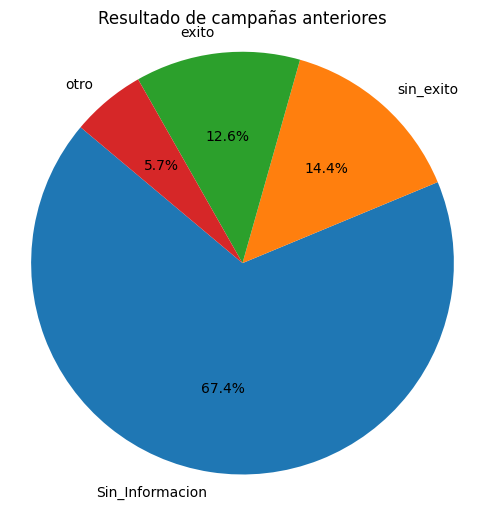

In [174]:
# vamos a graficar con matplotlib formato pie los resultados de la columna 'resultado_campanas_anteriores'  

# Calculamos el conteo de valores
conteo_valores_clientes_NO_potenciales = clientes_NO_potenciales_targetSI_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

#Vamos a extraer las etiquetas
etiquetas_clientes_NO_potenciales = conteo_valores_clientes_NO_potenciales.index  
valores_clientes_NO_potenciales = conteo_valores_clientes_NO_potenciales.values  

# Vamos a configurar el tamaño de la figura
plt.figure(figsize=(6, 6))  

# Graficamos el grafico de torta
plt.pie(valores_clientes_NO_potenciales, labels=etiquetas_clientes_NO_potenciales, autopct='%1.1f%%', startangle=140)

# Vamos añadir un titulo
plt.title('Resultado de campañas anteriores')

# Mostramos el grafico
plt.axis('equal') # Aseguramos que la grafica de torta sea un circulo
plt.show()

Encontramos dentro de los clientes_NO_potenciales que tienen 'si' en la columna 'target' que tenemos valores ceros en la columna 'contactos_anteriores' y 'resultado_campanas_anteriores'

# Buscaremos ahora sobre los que tienen con valor 'no' en la columna 'target' 

In [175]:
print("La cantidad de personas con valores 'no' en la columna 'target' de clientes ideales:", (clientes_ideales['target'] == 'no').sum())
print("La cantidad de personas con valores 'no' en la columna 'target' de clientes con potencial medio:", (clientes_con_potencial_medio['target'] == 'no').sum())
print("La cantidad de personas con valores 'no' en la columna 'target' de clientes NO potenciales:", (clientes_NO_potenciales['target'] == 'no').sum())


La cantidad de personas con valores 'no' en la columna 'target' de clientes ideales: 2239
La cantidad de personas con valores 'no' en la columna 'target' de clientes con potencial medio: 6282
La cantidad de personas con valores 'no' en la columna 'target' de clientes NO potenciales: 28984


## Clientes_ideales pero con valor 'no' en la columna 'target'

tenemos un total de 2239 clientes ideales, pero solamente 1122 personas con el perfil tipo.

In [176]:
# clientes_ideales buscaremos los que tengan valor 'no' en la columna 'target' e intentaremos ver si son nuestro perfil tipo para dar recomendaciones en ese segmento y asegurar un aumento significativo. 

clientes_ideales_targetNO_viviendaSI_deudaNO = clientes_ideales[(clientes_ideales['target'] == 'no') & (clientes_ideales['vivienda'] == 'si') & (clientes_ideales['deuda'] == 'no')]
clientes_ideales_targetNO_viviendaSI_deudaNO

# dentro de este grupo hay aproximadamente 180 personas que 'si' tienen 'prestamo'

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
29,30,51,blue-collar,casado,universitarios,no,7816,si,no,Sin_Informacion,76,12-may-2021,2,-1,0,Sin_Informacion,no
49,50,36,services,casado,secundaria/superiores,no,8114,si,no,Sin_Informacion,505,6-jun-2021,1,-1,0,Sin_Informacion,no
55,56,33,unemployed,soltero,universitarios,no,14889,si,no,movil,22,3-feb-2021,3,-1,0,Sin_Informacion,no
65,66,32,blue-collar,casado,secundaria/superiores,no,10142,si,no,movil,249,20-nov-2021,1,-1,0,Sin_Informacion,no
74,75,60,blue-collar,divorciado,priamaria,no,7601,si,no,Sin_Informacion,285,8-may-2021,1,-1,0,Sin_Informacion,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44193,44194,46,blue-collar,casado,priamaria,no,5461,si,no,movil,562,13-may-2021,2,174,2,exito,no
44199,44200,26,student,soltero,universitarios,no,13107,si,no,movil,112,27-may-2021,2,-1,0,Sin_Informacion,no
44233,44234,54,management,divorciado,universitarios,no,26306,si,no,movil,27,11-feb-2021,1,84,3,sin_exito,no
44239,44240,51,entrepreneur,casado,universitarios,no,6659,si,si,movil,191,20-nov-2021,2,189,1,sin_exito,no


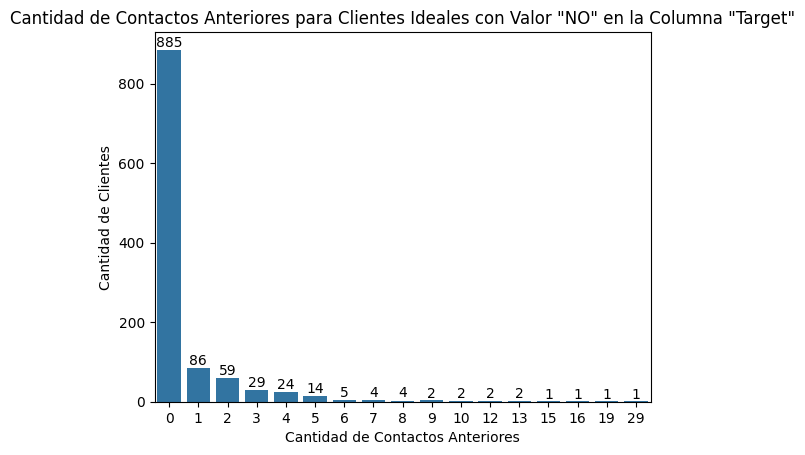

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt


# Graficar la cantidad de contactos_anteriores para los clientes con valor 'si' en la columna 'target'
sns.countplot(x='contactos_anteriores', data=clientes_ideales_targetNO_viviendaSI_deudaNO[clientes_ideales_targetNO_viviendaSI_deudaNO['target'] == 'no'])
plt.xlabel('Cantidad de Contactos Anteriores')

# Obtener los conteos para cada valor único de 'contactos_anteriores'
conteo_contactos = clientes_ideales_targetNO_viviendaSI_deudaNO['contactos_anteriores'].value_counts()

# Agregar etiquetas con los valores sobre cada barra
for index, value in enumerate(conteo_contactos):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Contactos Anteriores para Clientes Ideales con Valor "NO" en la Columna "Target"')
plt.show()

In [178]:
clientes_ideales_targetNO_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

resultado_campanas_anteriores
Sin_Informacion    885
sin_exito          178
otro                46
exito               13
Name: count, dtype: int64

In [179]:
clientes_ideales_targetNO_viviendaSI_deudaNO['contactos_anteriores'].value_counts()

contactos_anteriores
0     885
1      86
2      59
3      29
4      24
5      14
6       5
7       4
9       4
10      2
8       2
13      2
19      2
16      1
29      1
12      1
15      1
Name: count, dtype: int64

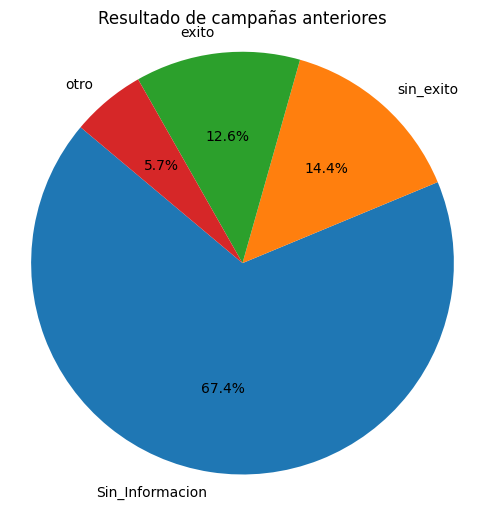

In [180]:
# vamos a graficar con matplotlib formato pie los resultados de la columna 'resultado_campanas_anteriores'  

# Calculamos el conteo de valores
conteo_valores_clientes_ideales_targetNO = clientes_ideales_targetNO_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

#Vamos a extraer las etiquetas
etiquetas_clientes_ideales_targetNO = conteo_valores_clientes_ideales_targetNO.index  
valores_clientes_ideales_targetNO = conteo_valores_clientes_ideales_targetNO.values  

# Vamos a configurar el tamaño de la figura
plt.figure(figsize=(6, 6))  

# Graficamos el grafico de torta
plt.pie(valores_clientes_NO_potenciales, labels=etiquetas_clientes_NO_potenciales, autopct='%1.1f%%', startangle=140)

# Vamos añadir un titulo
plt.title('Resultado de campañas anteriores')

# Mostramos el grafico
plt.axis('equal') # Aseguramos que la grafica de torta sea un circulo
plt.show()

claramente vemos que hay 885 personas que nunca se les contacto, dentro de los que tienen valores 'no' en la columna 'target' y son clientes ideales, pero no tenemos informacion de contacto_anteriores o resultado_campana_anteriores

# Clientes_con_potencial_medio pero con valor 'no' en la columna 'target'

tenemos 6282 clientes_con_potencial_medio, pero solamente 3437 con perfil tipo y con valor 'no' en la columna 'target'

In [181]:
(clientes_con_potencial_medio['target'] == 'no').sum()

6282

In [182]:
clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO = clientes_con_potencial_medio[(clientes_con_potencial_medio['target'] == 'no') & (clientes_con_potencial_medio['vivienda'] == 'si') & (clientes_con_potencial_medio['deuda'] == 'no')]
clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
79,80,41,admin.,casado,secundaria/superiores,no,2661,si,no,fijo,258,24-jul-2021,1,-1,0,Sin_Informacion,no
94,95,45,management,casado,universitarios,no,3857,si,no,movil,425,11-aug-2021,2,190,1,sin_exito,no
97,98,28,blue-collar,soltero,universitarios,no,1984,si,no,movil,32,4-may-2021,2,14,1,sin_exito,no
102,103,40,retired,soltero,secundaria/superiores,no,1734,si,no,Sin_Informacion,123,3-jun-2021,4,-1,0,Sin_Informacion,no
124,125,57,admin.,casado,secundaria/superiores,no,4168,si,si,Sin_Informacion,47,16-may-2021,1,-1,0,Sin_Informacion,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44184,44185,30,management,casado,secundaria/superiores,no,3817,si,no,movil,104,20-nov-2021,5,-1,0,Sin_Informacion,no
44185,44186,41,blue-collar,casado,secundaria/superiores,no,2067,si,no,movil,208,11-may-2021,4,325,4,sin_exito,no
44195,44196,48,blue-collar,casado,secundaria/superiores,no,2697,si,si,Sin_Informacion,79,26-may-2021,5,-1,0,Sin_Informacion,no
44204,44205,35,management,soltero,secundaria/superiores,no,3384,si,no,movil,372,31-jul-2021,2,-1,0,Sin_Informacion,no


In [183]:
clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

resultado_campanas_anteriores
Sin_Informacion    2717
sin_exito           500
otro                164
exito                56
Name: count, dtype: int64

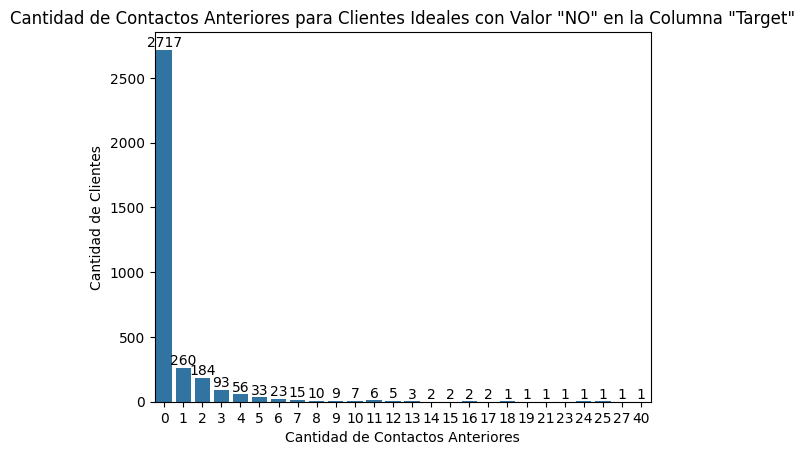

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt


# Graficar la cantidad de contactos_anteriores para los clientes con valor 'si' en la columna 'target'
sns.countplot(x='contactos_anteriores', data=clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO[clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO['target'] == 'no'])
plt.xlabel('Cantidad de Contactos Anteriores')

# Obtener los conteos para cada valor único de 'contactos_anteriores'
conteo_contactos = clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO['contactos_anteriores'].value_counts()

# Agregar etiquetas con los valores sobre cada barra
for index, value in enumerate(conteo_contactos):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Contactos Anteriores para Clientes Ideales con Valor "NO" en la Columna "Target"')
plt.show()

In [185]:
clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO['contactos_anteriores'].value_counts()

contactos_anteriores
0     2717
1      260
2      184
3       93
4       56
5       33
6       23
7       15
11      10
8        9
10       7
9        6
12       5
13       3
25       2
18       2
24       2
16       2
21       1
15       1
27       1
19       1
17       1
14       1
23       1
40       1
Name: count, dtype: int64

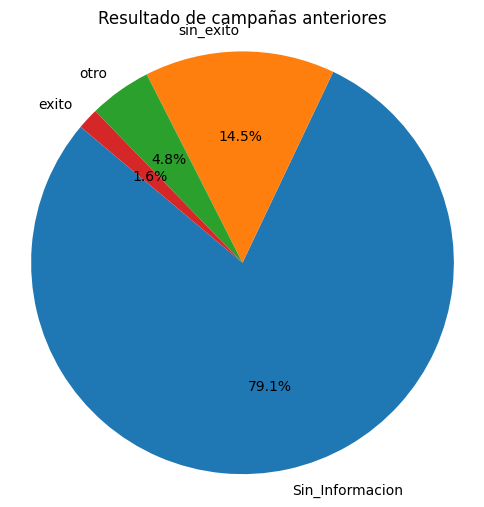

In [186]:
# vamos a graficar con matplotlib formato pie los resultados de la columna 'resultado_campanas_anteriores'  

# Calculamos el conteo de valores
conteo_valores_clientes_con_potencial_medio_targetNO = clientes_con_potencial_medio_targetNO_viviendaSI_deudaNO['resultado_campanas_anteriores'].value_counts()

#Vamos a extraer las etiquetas
etiquetas_clientes_con_potencial_medio_targetNO = conteo_valores_clientes_con_potencial_medio_targetNO.index  
valores_clientes_con_potencial_medio_targetNO = conteo_valores_clientes_con_potencial_medio_targetNO.values  

# Vamos a configurar el tamaño de la figura
plt.figure(figsize=(6, 6))  

# Graficamos el grafico de torta
plt.pie(valores_clientes_con_potencial_medio_targetNO, labels=etiquetas_clientes_con_potencial_medio_targetNO, autopct='%1.1f%%', startangle=140)

# Vamos añadir un titulo
plt.title('Resultado de campañas anteriores')

# Mostramos el grafico
plt.axis('equal') # Aseguramos que la grafica de torta sea un circulo
plt.show()

Aqui encontramos 2717 clientes_con_potencial_medio pero con valor 'no' en la columna 'target' y que no tienen valor en la columna 'contactos_anteriores' y 'resultado_campanas_anteriores' 

# vamos a darle valor de puntos para cada cliente

In [187]:
df_copia.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target
17247,17248,36,services,soltero,universitarios,no,72,si,no,Sin_Informacion,80,8-may-2021,1,-1,0,Sin_Informacion,no
18378,18379,35,admin.,casado,secundaria/superiores,si,0,si,si,movil,17,18-nov-2021,1,-1,0,Sin_Informacion,no
34173,34174,34,entrepreneur,casado,secundaria/superiores,no,2,si,si,movil,184,5-may-2021,1,167,6,sin_exito,no


In [188]:
df_copia['puntos'] = 0

C:\Users\Juan\AppData\Local\Temp\ipykernel_1760\2290829956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copia['puntos'] = 0


In [189]:
for index,row in df_copia.iterrows():
    valor_edad = row['edad']
    valor_estado_civil = row['estado_civil']
    valor_vivienda = row['vivienda']
    valor_saldo = row['saldo']
    valor_prestamo = row['prestamo']
    valor_deuda = row['deuda']
 
    if valor_estado_civil == 'casado':
        df_copia.at[index,'puntos'] += 2
    if valor_estado_civil == 'divorciado':
        df_copia.at[index,'puntos'] += 0
    if valor_estado_civil =='soltero':
        df_copia.at[index,'puntos'] += 1
 
    if valor_edad > 60:
        df_copia.at[index,'puntos'] += 1
    if valor_edad >30 and valor_edad < 60:
        df_copia.at[index,'puntos'] += 2
    if valor_edad < 30:
        df_copia.at[index,'puntos'] += 0
 
    if valor_vivienda == 'si':
        df_copia.at[index,'puntos'] += 2
    if valor_vivienda == 'no':
        df_copia.at[index,'puntos'] += 0
 
    if valor_saldo > 10000:
        df_copia.at[index,'puntos'] += 4
    if valor_saldo > 1000 and valor_saldo < 10000:
        df_copia.at[index,'puntos'] += 2
    if valor_saldo < 1000:
        df_copia.at[index,'puntos'] += -2
 
    if valor_prestamo == 'si':
        df_copia.at[index,'puntos'] -= 1
    else:
        df_copia.at[index,'puntos'] += 0
    if valor_deuda == 'si':
        df_copia.at[index,'puntos'] -= 1
    else:
        df_copia.at[index,'puntos'] += 0
 

In [190]:
df_copia.sample(3)

,ID,edad,trabajo,estado_civil,educacion,deuda,saldo,vivienda,prestamo,tipo_contacto,duracion,fecha_contacto,campaign,tiempo_transcurrido,contactos_anteriores,resultado_campanas_anteriores,target,puntos
426,427,53,management,divorciado,priamaria,no,255,no,no,movil,126,19-nov-2021,1,-1,0,Sin_Informacion,no,0
3514,3515,35,blue-collar,casado,priamaria,no,0,si,no,Sin_Informacion,154,6-may-2021,2,-1,0,Sin_Informacion,no,4
32141,32142,41,technician,casado,secundaria/superiores,no,2576,si,si,movil,296,8-may-2021,5,361,11,sin_exito,no,7
